# WIT - HACKATHON - AI

We've introduced an innovative approach to elevate this process and enrich developers' insights. Utilizing a dataset containing chapter leaders, assistant managers, and developers, our application now suggests and notifies the most suitable individuals for a given merge request. This not only streamlines the review process but also fosters cross-functional knowledge transfer, allowing anyone within the vertical to contribute. Consequently, best practices and new implementations become widely known, enhancing the overall coding environment.

When initiating a Merge Request on GitLab, there's an option to designate the reviewer for the request. Currently, the default setting assigns reviewers randomly. However, based on our exploratory data analysis (EDA) of the dataset, we've identified that the Merge Request benefits from a more targeted review by someone with expertise in the field, as it has shown improved accuracy in such cases.


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [75]:
code_review_dataset = pd.read_csv('/content/codeReviewDataset.csv')

Exploratory Data Analysis (EDA) is a crucial tool for data scientists, aiding in the analysis and understanding of datasets through visualization and investigation.

-> Developed by American mathematician John Tukey, EDA reveals patterns, anomalies, and relationships in data, guiding subsequent analysis.

->Its primary aim is to unveil insights without prior assumptions, ensuring validity and applicability to business goals. ->EDA identifies errors, discerns patterns, detects outliers, and validates questions posed by stakeholders.

->It facilitates understanding of variables, statistical techniques suitability, and aids in hypothesis testing.

->EDA's insights serve as a foundation for advanced analyses, including machine learning, enhancing decision-making processes.

In [76]:
#to display first 5 rows of the dataframe
code_review_dataset.head()

,S.NO,EMPLOYEE_ID,EMPLOYEE_NAME,DESIGNATION,VERTICAL,TECHNOLOGY_STACK,TECHNOLOGY_EXPERTISE,TOTAL_EXPERIENCE,EXPERIENCE_IN_RNTBCI,COUNT_CODE_REVIEW,PROJECT_WORKING
0,1,RNTBCI01,Harini,GET,ENGG-IS 01,FULL STACK,"['ANGULAR','JAVA','REACT']",0,1,0,GFE-POINTER
1,2,RNTBCI02,Joshua,GET,ENGG-IS 01,FULL STACK,"['ANGULAR','JAVA','REACT']",0,1,0,ONE-VALUE
2,3,RNTBCI03,Sophia,GET,ENGG-IS 01,FULL STACK,"['ANGULAR','JAVA','REACT']",0,1,0,ONE-VALUE
3,4,RNTBCI04,Liam,GET,ENGG-IS 01,FULL STACK,"['ANGULAR','JAVA','REACT']",0,1,0,GFE-POINTER
4,5,RNTBCI05,Ava,GET,ENGG-IS 01,FULL STACK,"['ANGULAR','JAVA','REACT']",0,1,0,HAVEL


SHAPE : The .shape attribute is used to get the dimensions of an array or matrix. It returns a tuple representing the shape of the array

In [77]:
code_review_dataset.shape

(50, 11)

Since the dataset is prepared by ourself , we ensured to not have any null values. To get a better accuracy, but in the real scenario if we collect the data from wide audience we have to solve the null values and the outliers and anamoly values to get a better accuracy.

In [78]:
#to check the null values in the given dataframe
code_review_dataset.isnull().sum()

S.NO                    0
EMPLOYEE_ID             0
EMPLOYEE_NAME           0
DESIGNATION             0
VERTICAL                0
TECHNOLOGY_STACK        0
TECHNOLOGY_EXPERTISE    3
TOTAL_EXPERIENCE        0
EXPERIENCE_IN_RNTBCI    0
COUNT_CODE_REVIEW       0
PROJECT_WORKING         0
dtype: int64

In [79]:
code_review_dataset.describe()

,S.NO,TOTAL_EXPERIENCE,EXPERIENCE_IN_RNTBCI,COUNT_CODE_REVIEW
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,4.180000,3.020000,78.340000
std,14.57738,3.612281,2.567378,83.918476
min,1.00000,0.000000,1.000000,0.000000
25%,13.25000,2.000000,1.000000,11.000000
50%,25.50000,2.000000,2.000000,30.500000
75%,37.75000,7.000000,4.000000,155.750000
max,50.00000,10.000000,10.000000,287.000000


From the table we have derived few insights ,

Experience in RNTBCI:

The experience in RNTBCI ranges from 1 to 10 years.
The majority (50th percentile) have an experience of 2 years.
Count of Code Review:

The average count of code reviews is 78.34, with a high standard deviation of 83.92.

The count of code reviews ranges from 0 to 287

The majority (50th percentile) have a code review count of 30.5.

Overall, the data suggests a diverse range of experiences, with a moderate average code review count that has a wide distribution, as indicated by the high standard deviation. The percentiles give a sense of the spread and central tendencies within each variable.

In [80]:
code_review_dataset.dtypes

S.NO                     int64
EMPLOYEE_ID             object
EMPLOYEE_NAME           object
DESIGNATION             object
VERTICAL                object
TECHNOLOGY_STACK        object
TECHNOLOGY_EXPERTISE    object
TOTAL_EXPERIENCE         int64
EXPERIENCE_IN_RNTBCI     int64
COUNT_CODE_REVIEW        int64
PROJECT_WORKING         object
dtype: object

In [81]:
columns_of_interest = ['EXPERIENCE_IN_RNTBCI', 'COUNT_CODE_REVIEW']

# Create a subset DataFrame with only the specified columns
subset_df = code_review_dataset[columns_of_interest]

# Calculate the 25th and 75th percentiles for each column
Q1 = subset_df.quantile(0.25)
Q3 = subset_df.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
outlier_threshold = 1.5

# Identify outliers for each column
outliers = ((subset_df < (Q1 - outlier_threshold * IQR)) | (subset_df > (Q3 + outlier_threshold * IQR)))

# Display rows with outliers for the specified columns
outliers_rows = code_review_dataset[outliers.any(axis=1)]
print(outliers_rows)


    S.NO EMPLOYEE_ID EMPLOYEE_NAME        DESIGNATION    VERTICAL  \
43    44    RNTBCI44        Thomas  ASSISTANT MANAGER  ENGG-IS 02   
44    45    RNTBCI45        lauren  ASSISTANT MANAGER  ENGG-IS 02   
49    50    RNTBCI50          Mira  ASSISTANT MANAGER  ENGG-IS 01   

      TECHNOLOGY_STACK         TECHNOLOGY_EXPERTISE  TOTAL_EXPERIENCE  \
43  BACK END DEVELOPER              ['JAVA', 'C++']                10   
44  BACK END DEVELOPER              ['JAVA', 'C++']                10   
49          FULL STACK   ['ANGULAR','JAVA','REACT']                10   

    EXPERIENCE_IN_RNTBCI  COUNT_CODE_REVIEW PROJECT_WORKING  
43                    10                203    SPECTRALYTIC  
44                     9                221          PDMPSS  
49                     9                287       CYBERVALT  


These rows are flagged as outliers based on the criteria used for detecting outliers in the 'EXPERIENCE_IN_RNTBCI' and 'COUNT_CODE_REVIEW' columns.  the context of your analysis.

In [82]:
# Define the columns of interest
columns_of_interest = ['EXPERIENCE_IN_RNTBCI', 'COUNT_CODE_REVIEW']

# Calculate the 25th and 75th percentiles for each column
Q1 = code_review_dataset[columns_of_interest].quantile(0.25)
Q3 = code_review_dataset[columns_of_interest].quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
outlier_threshold = 1.5

# Identify outliers for each column
outliers = ((code_review_dataset[columns_of_interest] < (Q1 - outlier_threshold * IQR)) | (code_review_dataset[columns_of_interest] > (Q3 + outlier_threshold * IQR)))

# Remove rows with outliers
df_no_outliers = code_review_dataset[~outliers.any(axis=1)]

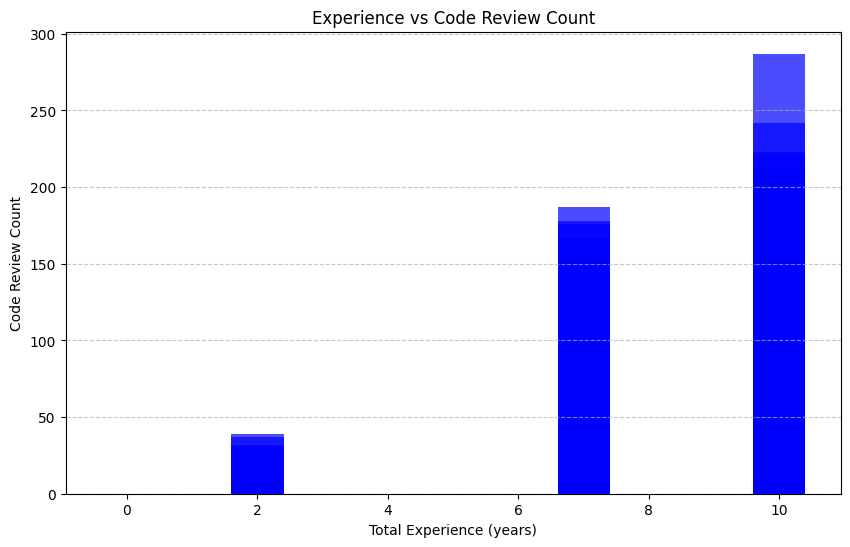

In [83]:
experience = code_review_dataset['TOTAL_EXPERIENCE']
code_review_count = code_review_dataset['COUNT_CODE_REVIEW']

plt.figure(figsize=(10, 6))

# Bar plot
plt.bar(experience, code_review_count, color='blue', alpha=0.7)
plt.title('Experience vs Code Review Count')
plt.xlabel('Total Experience (years)')
plt.ylabel('Code Review Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar graph will get using the provided code will represent the relationship between 'Total Experience' and 'Code Review Count.' Each bar in the graph corresponds to a different value of 'Total Experience,' and the height of the bar represents the 'Code Review Count' for that particular experience level.

It is seen that people with 7 years of experience have done the most code review than the 10 years experience people , So its a myth that people with more experience would have done more review! Hence expereince is not propotional with your knowledge, So anybody can start to code review to learn and evolve.

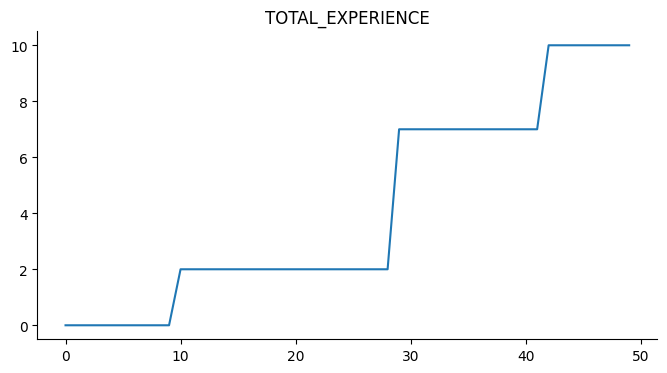

In [84]:
_df_16['TOTAL_EXPERIENCE'].plot(kind='line', figsize=(8, 4), title='TOTAL_EXPERIENCE')
plt.gca().spines[['top', 'right']].set_visible(False)

The steps in the line plot reflect these distinct values, creating a staircase-like pattern. This is typical for categorical or ordinal data where the variable can only take specific, distinct values.

To enhance the interpretation, you may consider labeling the x-axis with the corresponding indices or use categorical data visualization techniques if applicable. Additionally, understanding the context of your data and why these specific values are significant will help in providing a more meaningful interpretation.

Choosing the interpolation method that best fits the data and the level of smoothing desired.

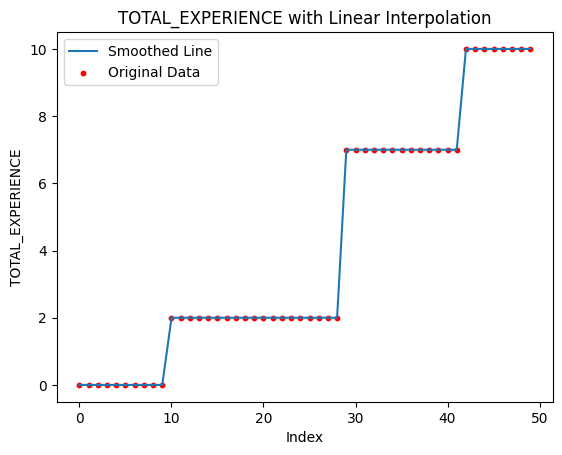

In [85]:
x = _df_16.index
y = _df_16['TOTAL_EXPERIENCE']

f = interp1d(x, y, kind='linear')

# Generate a smoother x-axis
x_smooth = np.linspace(x.min(), x.max(), 1000)

# Plot the smoothed line
plt.plot(x_smooth, f(x_smooth), label='Smoothed Line')
plt.scatter(x, y, color='red', label='Original Data', s=10)
plt.title('TOTAL_EXPERIENCE with Linear Interpolation')
plt.xlabel('Index')
plt.ylabel('TOTAL_EXPERIENCE')
plt.legend()
plt.show()

Few distinct points that I am considering to divide into three slabs are people with 2 years , 7 years and 10 years of experience. When we assign people for code reviewing we allocate from any of the three buckets [ 2 years , 7 years , 10 years] this is for the existing dataset.

Now, I am finding number of technology stack is there inside the organisation, and counting number of employee working in the specific positions.

First I am finding the unique technology stacks and then with that I am processing number of people who works in that technology and then comparing it with their experience and number of code review done by them.

In [86]:
unique_values = code_review_dataset['TECHNOLOGY_STACK'].unique()
# Display the unique values
print(unique_values)

['FULL STACK' 'UI-UX' 'MATLAB' 'PROC' 'BACK END DEVELOPER'
 'FRONT END DEVELOPER' 'DEVops']


In [87]:
column_to_check = 'TECHNOLOGY_STACK'
target_stack = ['FULL STACK', 'UI-UX', 'MATLAB', 'PROC', 'BACK END DEVELOPER', 'FRONT END DEVELOPER', 'DEVops']

# Count the occurrences of each unique value in the specified column
value_counts = code_review_dataset[column_to_check].value_counts()

# Check the count for each specific value in the target_stack
for stack in target_stack:
    count_stack = value_counts.get(stack, 0)
    # Display the count
    print(f"Count of '{stack}': {count_stack}")

Count of 'FULL STACK': 19
Count of 'UI-UX': 3
Count of 'MATLAB': 2
Count of 'PROC': 1
Count of 'BACK END DEVELOPER': 10
Count of 'FRONT END DEVELOPER': 11
Count of 'DEVops': 4


In [88]:
column_to_check = 'TECHNOLOGY_STACK'
target_stack = ['FULL STACK', 'UI-UX', 'MATLAB', 'PROC', 'BACK END DEVELOPER', 'FRONT END DEVELOPER', 'DEVops']

# Filter the DataFrame based on the target_stack positions
filtered_df = code_review_dataset[code_review_dataset[column_to_check].isin(target_stack)]

# Count the occurrences of each unique value in the 'EXPERIENCE_IN_RNTBCI' column for the filtered positions
experience_counts = filtered_df.groupby(column_to_check)['EXPERIENCE_IN_RNTBCI'].nunique()

# Display the counts
print(experience_counts)

TECHNOLOGY_STACK
BACK END DEVELOPER     8
DEVops                 2
FRONT END DEVELOPER    6
FULL STACK             4
MATLAB                 1
PROC                   1
UI-UX                  1
Name: EXPERIENCE_IN_RNTBCI, dtype: int64


In [89]:
column_to_check = 'TECHNOLOGY_STACK'
target_stack = ['FULL STACK', 'UI-UX', 'MATLAB', 'PROC', 'BACK END DEVELOPER', 'FRONT END DEVELOPER', 'DEVops']

# Filter the DataFrame based on the target_stack positions
filtered_df = code_review_dataset[code_review_dataset[column_to_check].isin(target_stack)]

# Find the EMPLOYEE_ID of those who have done the maximum code review for each tech stack
max_review_employees = filtered_df.loc[filtered_df.groupby(column_to_check)['COUNT_CODE_REVIEW'].idxmax()][['EMPLOYEE_ID', 'COUNT_CODE_REVIEW','TECHNOLOGY_STACK']]

# Sort the result by COUNT_CODE_REVIEW in descending order
sorted_max_review_employees = max_review_employees.sort_values(by='COUNT_CODE_REVIEW', ascending=False)

# Display the sorted result
print(sorted_max_review_employees)

   EMPLOYEE_ID  COUNT_CODE_REVIEW     TECHNOLOGY_STACK
49    RNTBCI50                287           FULL STACK
47    RNTBCI48                242  FRONT END DEVELOPER
44    RNTBCI45                221   BACK END DEVELOPER
10    RNTBCI11                 30                 PROC
27    RNTBCI28                 23               DEVops
8     RNTBCI09                  0               MATLAB
5     RNTBCI06                  0                UI-UX


In [90]:
column_to_check = 'TECHNOLOGY_STACK'
target_stack = ['FULL STACK', 'UI-UX', 'MATLAB', 'PROC', 'BACK END DEVELOPER', 'FRONT END DEVELOPER', 'DEVops']

# Filter the DataFrame based on the target_stack positions
filtered_df = code_review_dataset[code_review_dataset[column_to_check].isin(target_stack)]

# Sort the DataFrame by 'COUNT_CODE_REVIEW' and 'EXPERIENCE_IN_RNTBCI' in descending order
sorted_df = filtered_df.sort_values(by=['COUNT_CODE_REVIEW', 'EXPERIENCE_IN_RNTBCI'], ascending=False)

# Create a list of sorted EMPLOYEE_IDs
sorted_employee_ids = sorted_df['EMPLOYEE_ID'].tolist()

# Display the sorted list of EMPLOYEE_IDs
print(sorted_employee_ids)


['RNTBCI50', 'RNTBCI48', 'RNTBCI47', 'RNTBCI45', 'RNTBCI43', 'RNTBCI44', 'RNTBCI46', 'RNTBCI42', 'RNTBCI41', 'RNTBCI33', 'RNTBCI36', 'RNTBCI34', 'RNTBCI39', 'RNTBCI38', 'RNTBCI49', 'RNTBCI40', 'RNTBCI37', 'RNTBCI32', 'RNTBCI35', 'RNTBCI31', 'RNTBCI30', 'RNTBCI24', 'RNTBCI17', 'RNTBCI25', 'RNTBCI20', 'RNTBCI11', 'RNTBCI19', 'RNTBCI13', 'RNTBCI28', 'RNTBCI15', 'RNTBCI26', 'RNTBCI12', 'RNTBCI22', 'RNTBCI27', 'RNTBCI16', 'RNTBCI14', 'RNTBCI18', 'RNTBCI21', 'RNTBCI23', 'RNTBCI29', 'RNTBCI01', 'RNTBCI02', 'RNTBCI03', 'RNTBCI04', 'RNTBCI05', 'RNTBCI06', 'RNTBCI07', 'RNTBCI08', 'RNTBCI09', 'RNTBCI10']


EXAMPLE:

In the context of a GitLab Merge Request titled 'FRONT END,' I've encountered a limitation where assigning reviewers based on their technology stack isn't directly supported. To address this, I've utilized the GitLab API to retrieve the Merge Request title and employed it as the target_position. I've analyzed the available dataset and extracted a list of reviewers distinguished by their substantial experience and extensive track record in conducting code reviews within the specified technology stack. This approach aims to enhance the reviewer assignment process by prioritizing individuals with expertise in the relevant technology.

Now am creating an Merge Request with the label as FRONT END , We can create it based on which reviewer needs to review our merge request.

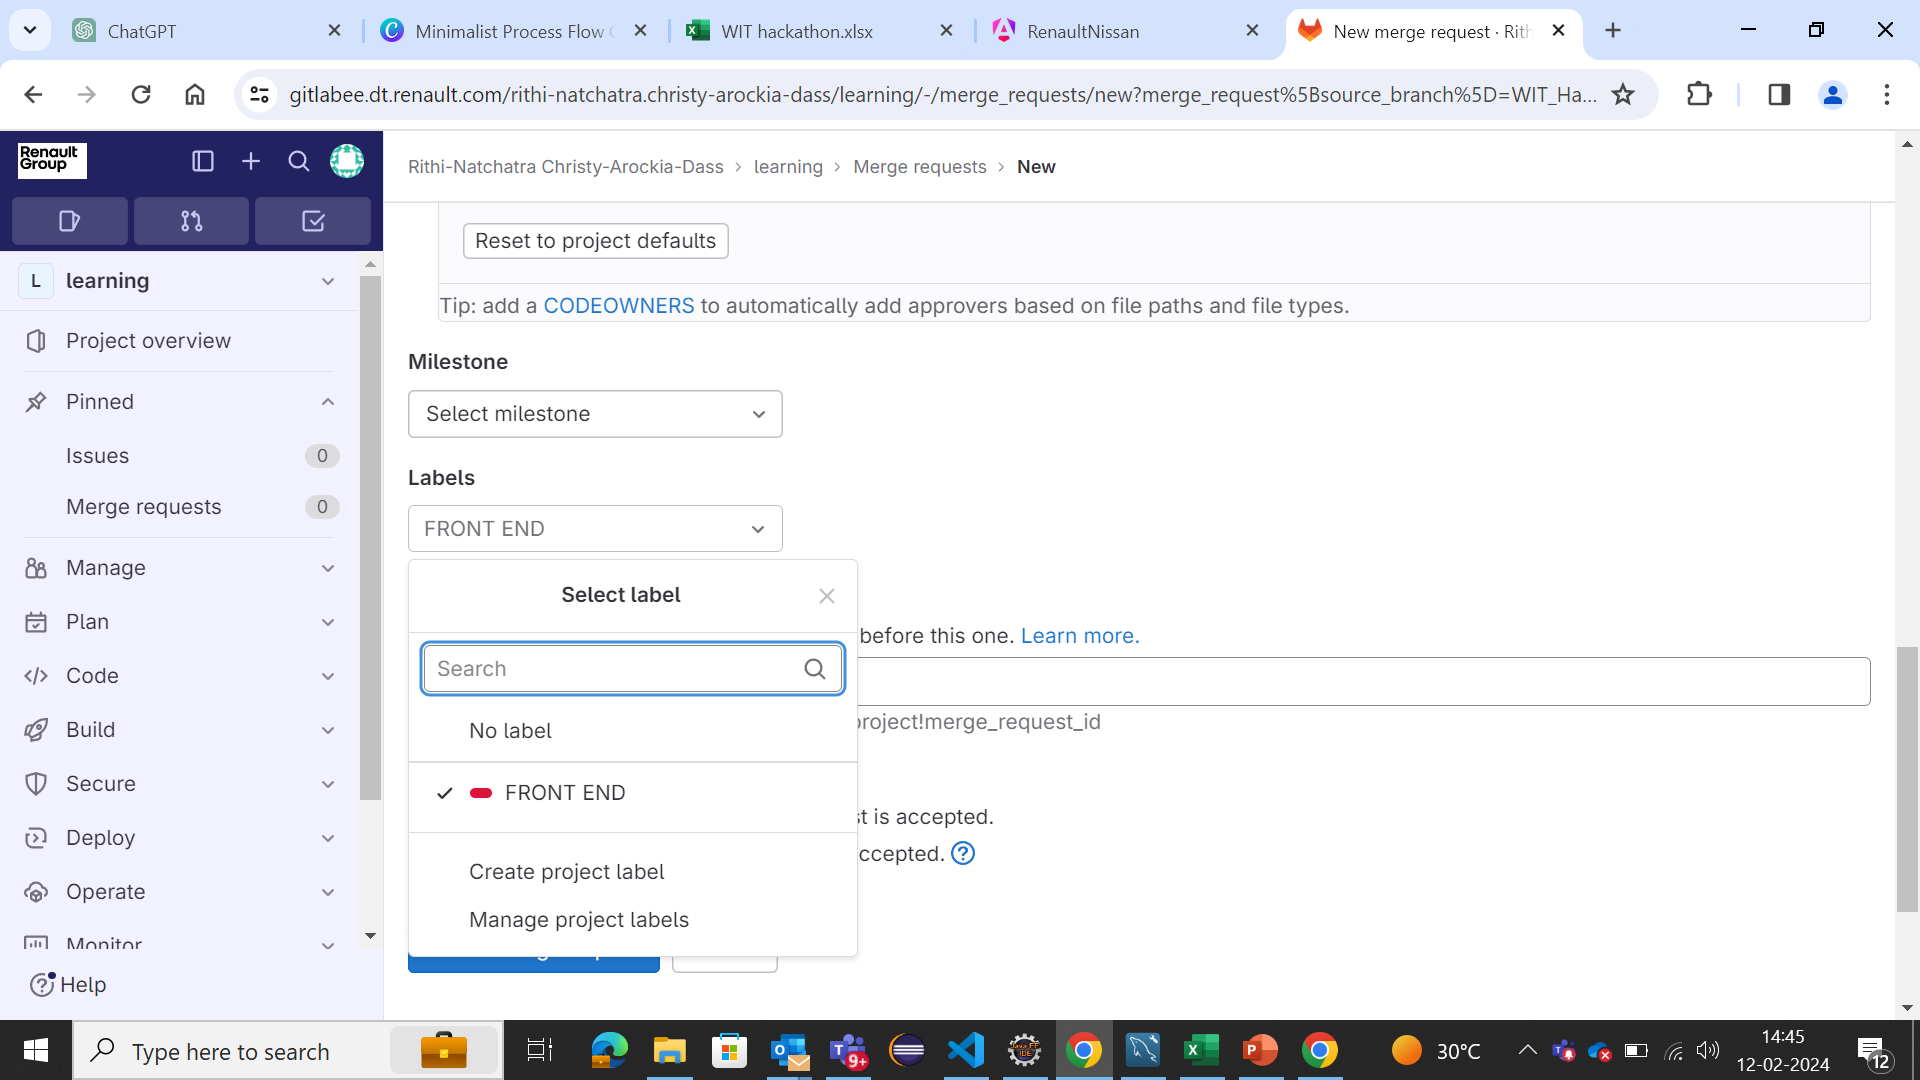

With the created Merge request we have not given any access to the reviewers.

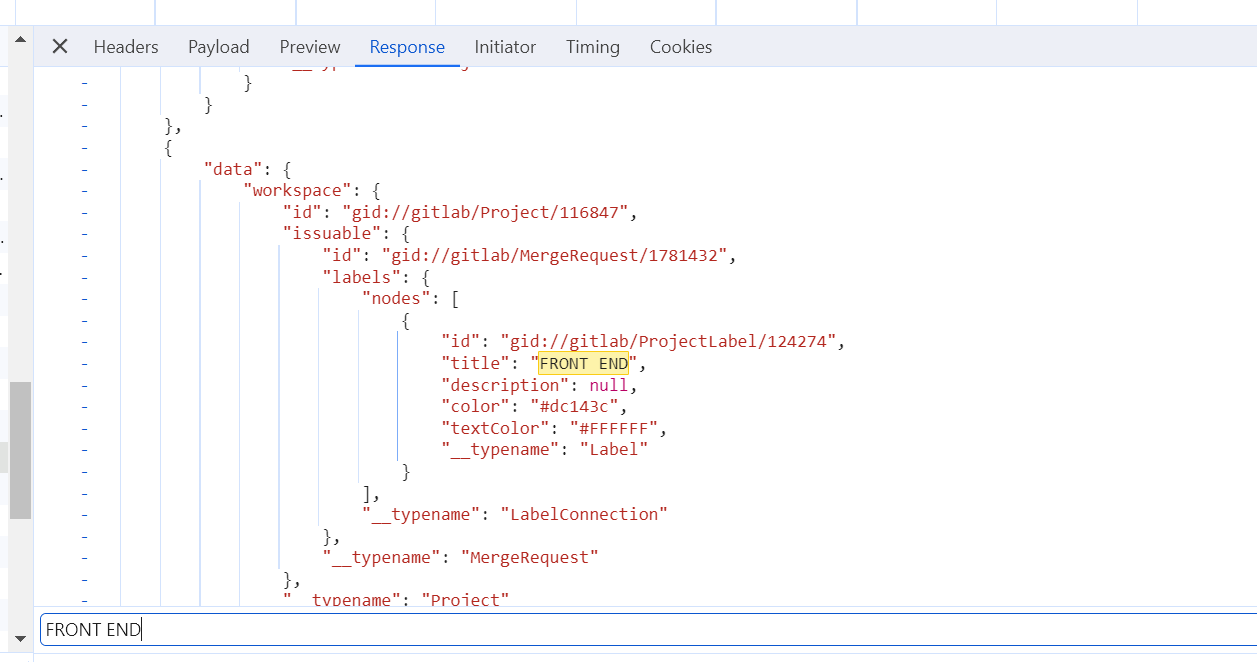

In [71]:
column_to_check = 'TECHNOLOGY_STACK'
target_position = 'FRONT END DEVELOPER'

# Filter the DataFrame based on the target position
filtered_df = code_review_dataset[code_review_dataset[column_to_check] == target_position]

# Sort the DataFrame by 'COUNT_CODE_REVIEW' and 'EXPERIENCE_IN_RNTBCI' in descending order
sorted_df = filtered_df.sort_values(by=['COUNT_CODE_REVIEW'], ascending=False)

# Create a list of EMPLOYEE_IDs meeting the criteria
filtered_employee_ids = sorted_df['EMPLOYEE_ID'].tolist()

# Display the filtered list of EMPLOYEE_IDs
print(filtered_employee_ids)

['RNTBCI48', 'RNTBCI47', 'RNTBCI46', 'RNTBCI36', 'RNTBCI39', 'RNTBCI38', 'RNTBCI49', 'RNTBCI37', 'RNTBCI20', 'RNTBCI19', 'RNTBCI18']


We have received a list of Employee IDs who are experienced wit the particular technology stack , who are eligible to do the code review.

In [91]:
# Generate synthetic data
np.random.seed(42)

# Features for each code review
features = np.random.rand(50, 2)  # 50 code reviews with 2 features each

# True coefficients for the linear relationship
true_coefficients = np.array([0.5, 0.8])

# Generate scores as a linear combination of features with some random noise
scores = np.dot(features, true_coefficients) + np.random.normal(0, 0.1, 50)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = features[:40], features[40:], scores[:40], scores[40:]

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate mean squared error as a measure of performance
mse = np.mean((predictions - y_test)**2)

print(f"Mean Squared Error: {mse}")

# Now, let's predict scores for two sets of code reviews (specified IDs and other IDs)
specified_ids_features = np.random.rand(5, 2)
other_ids_features = np.random.rand(5, 2)

specified_ids_predictions = model.predict(specified_ids_features)
other_ids_predictions = model.predict(other_ids_features)

# Calculate the score difference
score_difference = specified_ids_predictions - other_ids_predictions

print("Score Difference:")
print(score_difference)

Mean Squared Error: 0.013411468458015838
Score Difference:
[ 0.19026054 -0.34237328 -0.14210418  0.10709102 -0.6946801 ]


The MSE is relatively low, suggesting that the model is doing a decent job of predicting scores based on the features.
The score differences indicate how the predicted scores for specified IDs differ from those for other IDs. Positive differences suggest that specified IDs tend to have higher predicted scores compared to other IDs, while negative differences suggest the opposite.

It's important to note that this is a simplified example, and the interpretation of the model's performance and score differences may vary based on a real-world scenario.